# installation of Dependency files

In [4]:
# %pip install -r C:/challenge/requirements.txt

     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB 1.4 MB/s eta 0:00:04
     ---------------------------------------- 0.0/4.7 MB 1.4 MB/s eta 0:00:04
      --------------------------------------- 0.1/4.7 MB 655.4 kB/s eta 0:00:08
      --------------------------------------- 0.1/4.7 MB 731.4 kB/s eta 0:00:07
     - -------------------------------------- 0.2/4.7 MB 845.5 kB/s eta 0:00:06
     - -------------------------------------- 0.2/4.7 MB 901.1 kB/s eta 0:00:05
     --- ------------------------------------ 0.4/4.7 MB 1.1 MB/s eta 0:00:04
     ---- ----------------------------------- 0.5/4.7 MB 1.4 MB/s eta 0:00:04
     ----- ---------------------------------- 0.7/4.7 MB 1.6 MB/s eta 0:00:03
     -------- ------------------------------- 1.0/4.7 MB 2.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.0/4.7 MB 2.1 MB/s eta 0:00:02
     ------------ --------------------------- 1.5/4.7 MB 2.8 MB

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [267 lines of output]
  Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm64" and platform_system == "Da

In [5]:
# Pandas is a Python library for data analysis
!pip install pandas
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
!pip install matplotlib
!pip install mysql-connector-python
# SQLAlchemy is the Python SQL toolkit and Object Relational Mapper
!pip install SQLAlchemy
#Requests is a popular open source HTTP library that simplifies working with HTTP requests.
!pip install requests


[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Import/Transformation from different sources

1- Sales Data File
2- JSONPlaceholder API - User Info
3- Weather info Api - openweathermap

In [32]:
import requests
import pandas as pd
import configparser

config = configparser.ConfigParser()
#change file path
config.read('C:/challenge/config.ini')

# Fetch user data from JSONPlaceholder API
def fetch_user_data():
    url = 'https://jsonplaceholder.typicode.com/users'
    response = requests.get(url)
    if response.status_code == 200:
        user_data = response.json()
        # Extract relevant fields like id, name, username, email, lat, lng
        processed_user_data = [{ 'id': user['id'], 'name': user['name'], 'username': user['username'],
                                 'email': user['email'], 'lat': user['address']['geo']['lat'],
                                 'lng': user['address']['geo']['lng'] } for user in user_data]
        return processed_user_data
    else:
        print("Failed to fetch user data from JSONPlaceholder API")
        return []

# Assuming you have sales data in a CSV file and you've loaded it into a pandas DataFrame
# change this path accordingly
filepath=config['filepath']['salesfile']
sales_df = pd.read_csv(filepath)

# Merge user data with sales data based on customer_id
user_df = pd.DataFrame(fetch_user_data())

sales_fictional_store_data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'store_location': ['Dubai', 'Dubai', 'Dubai','Dubai','Abu Dhabi','Abu Dhabi','Abu Dhabi','Sharjah','Sharjah','Ajman'],
    'store_location_id': [1, 1 , 1 , 1, 2, 2, 2, 3, 3, 4]
}

# Creating the DataFrame
fictional_store_df = pd.DataFrame(sales_fictional_store_data)

# Get distinct values for location_id and store_name
distinct_store_df = fictional_store_df[['store_location_id', 'store_location']].drop_duplicates()

# Merge user data based on customer_id
merged_user_df = pd.merge(sales_df, user_df, how='left', left_on='customer_id', right_on='id')

# Merge based on customer_id
merged_user_store_df = pd.merge(merged_user_df, fictional_store_df, how='left', left_on='customer_id', right_on='customer_id')

# drop duplicate column id 
merged_user_store_df = merged_user_store_df.drop('id', axis=1)

# Function to fetch weather data
def fetch_weather_data(location):
    api_key = '56353096ee15a8795eb6f075207a2eec'
    url = 'https://api.openweathermap.org/data/2.5/weather'
    params = {'q': location, 'appid': api_key}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        weather_data = response.json()
        # Extract relevant weather information like temperature, weather conditions
        # Process the data as needed
        processed_weather_data = {'temperature': weather_data['main']['temp'], 'conditions': weather_data['weather'][0]['main'],'location':location}
        return processed_weather_data
    else:
        print("Failed to fetch weather data from OpenWeatherMap API")
        return {}

    
    
# Fetch weather data for each sale's location
locations = merged_user_store_df['store_location'].unique()

weather_info = []
for location in locations:
    data = fetch_weather_data(location)
    if data:
        weather_info.append(data)

#convert array to data frame
weather_df = pd.DataFrame(weather_info) 

# Merge based on customer_id
merged_user_weather_df = pd.merge(merged_user_store_df, weather_df, how='left', left_on='store_location', right_on='location')

display(merged_user_weather_df)



order_id  customer_id  product_id  quantity  price  order_date   
0        2334            5          40         3  35.60  2022-06-21  \
1        6228            8          13         7  36.52  2023-03-08   
2        7784            9          44         4  46.56  2023-04-22   
3        6588            5          26         1  15.87  2022-10-23   
4        5910            8          32        10  77.00  2022-10-05   
..        ...          ...         ...       ...    ...         ...   
995      7967            6          34        10  14.44  2022-07-26   
996      8308            6          16         1  61.38  2023-03-04   
997      6938            4          18         7  62.96  2022-11-27   
998      5921            9          37         9  52.89  2022-09-22   
999      8395            4          16         7  46.09  2022-06-10   

                         name          username                      email   
0            Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca  \
1    Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
2             Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
3            Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
4    Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
..                        ...               ...                        ...   
995      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
996      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
997          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
998           Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
999          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   

          lat        lng store_location  store_location_id  temperature   
0    -31.8129    62.5342      Abu Dhabi                  2       304.23  \
1    -14.3990  -120.7677        Sharjah                  3       303.15   
2     24.6463  -168.8889        Sharjah                  3       303.15   
3    -31.8129    62.5342      Abu Dhabi                  2       304.23   
4    -14.3990  -120.7677        Sharjah                  3       303.15   
..        ...        ...            ...                ...          ...   
995  -71.4197    71.7478      Abu Dhabi                  2       304.23   
996  -71.4197    71.7478      Abu Dhabi                  2       304.23   
997   29.4572  -164.2990          Dubai                  1       302.77   
998   24.6463  -168.8889        Sharjah                  3       303.15   
999   29.4572  -164.2990          Dubai                  1       302.77   

    conditions   location  
0       Clouds  Abu Dhabi  
1       Clouds    Sharjah  
2       Clouds    Sharjah  
3       Clouds  Abu Dhabi  
4       Clouds    Sharjah  
..         ...        ...  
995     Clouds  Abu Dhabi  
996     Clouds  Abu Dhabi  
997     Clouds      Dubai  
998     Clouds    Sharjah  
999     Clouds      Dubai  

[1000 rows x 16 columns]

# Data Manipulation and Aggregations:

In [33]:
# Data transformation
merged_user_weather_df['sales_amount'] = merged_user_weather_df['quantity'] * merged_user_weather_df['price']
merged_user_weather_df['order_date'] = pd.to_datetime(merged_user_weather_df['order_date']) 
# Extract month and quarter from the 'Date' column
merged_user_weather_df['year'] = merged_user_weather_df['order_date'].dt.year
merged_user_weather_df['month'] = merged_user_weather_df['order_date'].dt.to_period('M')
merged_user_weather_df['quarter'] = merged_user_weather_df['order_date'].dt.to_period('Q')

# Data Manipulation and Aggregations 

# Calculating total sales amount per customer
total_sales_per_customer = merged_user_weather_df.groupby(['customer_id','username'])['sales_amount'].sum().reset_index()
display(total_sales_per_customer)

# Calculating average order quantity per product
avg_order_quantity_per_product = merged_user_weather_df.groupby('product_id')['quantity'].mean().reset_index()
# Rename the 'OldName' column to 'NewName' in-place
avg_order_quantity_per_product.rename(columns={'quantity': 'avg_quantity'}, inplace=True)
display(avg_order_quantity_per_product)
# Identifying top-selling products or customers
top_selling_products = merged_user_weather_df.groupby('product_id')['sales_amount'].sum().nlargest(5).reset_index()
display(top_selling_products)
top_customers = merged_user_weather_df.groupby(['customer_id','name','email'])['sales_amount'].sum().nlargest(5).reset_index()
top_customers.rename(columns={'name': 'customer_name','email': 'customer_email'}, inplace=True)
display(top_customers)

# Calculating total sales amount per quarter
total_sales_per_quarter = merged_user_weather_df.groupby('quarter')['sales_amount'].sum().reset_index()
display(total_sales_per_quarter)
# Calculating total sales amount per year
total_sales_per_year = merged_user_weather_df.groupby('year')['sales_amount'].sum().reset_index()
display(total_sales_per_year)
# Calculating total sales amount per year month
total_sales_per_month = merged_user_weather_df.groupby('month')['sales_amount'].sum().reset_index()
display(total_sales_per_month)

# Calculating total sales amount per store location
total_sales_per_store_location = merged_user_weather_df.groupby('store_location')['sales_amount'].sum().reset_index()
display(total_sales_per_store_location)
# Calculating total sales amount per weather condition
total_sales_per_weather_condition = merged_user_weather_df.groupby('conditions')['sales_amount'].mean().reset_index()
total_sales_per_weather_condition.rename(columns={'conditions': 'weather_condition'}, inplace=True)
display(total_sales_per_weather_condition)



customer_id          username  sales_amount
0            1              Bret      24680.98
1            2         Antonette      33147.26
2            3          Samantha      31018.80
3            4          Karianne      28625.48
4            5            Kamren      31156.73
5            6  Leopoldo_Corkery      30168.84
6            7      Elwyn.Skiles      28737.81
7            8     Maxime_Nienow      31860.25
8            9          Delphine      33040.69
9           10    Moriah.Stanton      36704.17

product_id  avg_quantity
0            1      5.000000
1            2      5.916667
2            3      6.307692
3            4      6.750000
4            5      5.000000
5            6      5.461538
6            7      4.866667
7            8      6.222222
8            9      5.133333
9           10      4.954545
10          11      5.027778
11          12      6.350000
12          13      6.090909
13          14      7.187500
14          15      5.500000
15          16      5.200000
16          17      5.555556
17          18      6.000000
18          19      6.227273
19          20      6.000000
20          21      4.888889
21          22      5.461538
22          23      5.571429
23          24      6.700000
24          25      4.842105
25          26      5.344828
26          27      6.809524
27          28      5.833333
28          29      5.791667
29          30      6.105263
30          31      5.083333
31          32      5.380952
32          33      5.000000
33          34      6.200000
34          35      5.631579
35          36      6.115385
36          37      4.880000
37          38      5.764706
38          39      5.000000
39          40      4.400000
40          41      4.500000
41          42      4.928571
42          43      5.466667
43          44      5.592593
44          45      5.148148
45          46      5.333333
46          47      5.120000
47          48      6.421053
48          49      5.291667
49          50      5.666667

product_id  sales_amount
0          11      11725.72
1          23       9979.01
2          36       9701.48
3          20       9421.99
4          22       8726.46

customer_id             customer_name            customer_email   
0           10        Clementina DuBuque    Rey.Padberg@karina.biz  \
1            2              Ervin Howell         Shanna@melissa.tv   
2            9           Glenna Reichert   Chaim_McDermott@dana.io   
3            8  Nicholas Runolfsdottir V      Sherwood@rosamond.me   
4            5          Chelsey Dietrich  Lucio_Hettinger@annie.ca   

   sales_amount  
0      36704.17  
1      33147.26  
2      33040.69  
3      31860.25  
4      31156.73

quarter  sales_amount
0  2022Q2      25539.24
1  2022Q3      80158.99
2  2022Q4      77993.63
3  2023Q1      74948.29
4  2023Q2      50500.86

year  sales_amount
0  2022     183691.86
1  2023     125449.15

month  sales_amount
0   2022-06      25539.24
1   2022-07      28217.77
2   2022-08      25121.81
3   2022-09      26819.41
4   2022-10      25448.66
5   2022-11      22888.05
6   2022-12      29656.92
7   2023-01      22724.84
8   2023-02      27308.78
9   2023-03      24914.67
10  2023-04      27713.28
11  2023-05      22360.13
12  2023-06        427.45

store_location  sales_amount
0      Abu Dhabi      90063.38
1          Ajman      36704.17
2          Dubai     117472.52
3        Sharjah      64900.94

weather_condition  sales_amount
0            Clouds     309.14101

# Full Refresh Data pipeline to mysql Db  (override tables data )

In [34]:
# import modules
import pandas as pd
from sqlalchemy import create_engine, types
import configparser
# user defined function to eastablish the mysql connection
def elstablish_mysqlconneciton():
    # MySQL database connection parameters
    mysql_username = config['mysql']['user']
    mysql_password = config['mysql']['password']
    mysql_host = config['mysql']['host']
    mysql_port = config['mysql']['port']
    mysql_db = config['mysql']['database']
    # SQLAlchemy engine
    dbconn = create_engine(f'mysql+mysqlconnector://{mysql_username}:{mysql_password}@{mysql_host}:{mysql_port}/{mysql_db}')
    return dbconn

mysqlconn=elstablish_mysqlconneciton()



def Insertmysqltable(df,tablename,conn,dtype_mapping):
    if dtype_mapping:
        df.to_sql(name=tablename, con=conn, if_exists='replace', index=False,dtype=dtype_mapping)
    else:
        df.to_sql(name=tablename, con=conn, if_exists='replace', index=False)

synced_date = pd.to_datetime(pd.Timestamp.now())

# Specify data types for each column in the DataFrame
user_df['synced_date'] = synced_date
user_dtype_mapping = {
    'id': types.Integer(),
    'name': types.String(100),
    'username': types.String(100),
    'email': types.String(100),
    'lat': types.Float(10,2),
    'lng': types.Float(10,2),
    'synced_date':  types.DateTime()
}
# insert users data to users table
Insertmysqltable(user_df,'user',mysqlconn,user_dtype_mapping)

sales_df['synced_date'] = synced_date
sales_dtype_mapping = {
    'order_id': types.Integer(),
    'customer_id':  types.Integer(),
    'product_id':  types.Integer(),
    'quantity': types.Integer(),
    'price': types.Float(10,2),
    'order_date': types.Date,
    'synced_date':  types.DateTime()
}
# order data to sales order table
Insertmysqltable(sales_df,'salesorder',mysqlconn,sales_dtype_mapping)


store_location_dtype_mapping = {
    'store_location_id': types.Integer(),
    'store_location':  types.String(100)
}
# store location data to store location table
Insertmysqltable(distinct_store_df,'fictionalstorelocation',mysqlconn,store_location_dtype_mapping)



weather_df['synced_date'] = synced_date
weather_dtype_mapping = {
    'temperature': types.Float(10,2),
    'conditions':  types.String(100),
    'location':  types.String(100),
    'synced_date':  types.DateTime()
}
# store weather data to weather info table
Insertmysqltable(weather_df,'weatherinfo',mysqlconn,weather_dtype_mapping)

#aggregate tables

total_sales_per_customer['synced_date'] = synced_date
sales_per_customer_dtype_mapping = {
    'customer_id': types.Integer(),
    'username':  types.String(100),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
# Sales by customer data to rptsalesbycustomer table
Insertmysqltable(total_sales_per_customer,'rptsalesbycustomer',mysqlconn,sales_per_customer_dtype_mapping)

avg_order_quantity_per_product['synced_date'] = synced_date
avgqty_per_product_dtype_mapping = {
    'product_id': types.Integer(),
    'avg_quantity':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
# store r avg order qty by product data to rptavgorderqtybyproduct table
Insertmysqltable(avg_order_quantity_per_product,'rptavgorderqtybyproduct',mysqlconn,avgqty_per_product_dtype_mapping)

top_customers['synced_date'] = synced_date

top_customers_dtype_mapping = {
    'customer_id':types.Integer(),
    'customer_name': types.String(100),
    'customer_email': types.String(100),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
#  top 5 customers by sale data to rpttopcustomersbysale table
Insertmysqltable(top_customers,'rpttopcustomersbysale',mysqlconn,top_customers_dtype_mapping)

top_selling_products['synced_date'] = synced_date
top_selling_products_dtype_mapping = {
    'product_id':types.Integer(),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
#  top 5 customers by sale data to rpttopcustomersbysale table
Insertmysqltable(top_selling_products,'rpttopsellingproducts',mysqlconn,top_selling_products_dtype_mapping)

total_sales_per_quarter['synced_date'] = synced_date
total_sales_per_quarter['quarter'] = total_sales_per_quarter['quarter'].astype(str)
sales_per_quarter_dtype_mapping = {
    'quarter': types.String(30),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
# store sales by quarter data to rptsalesbyquarter table
Insertmysqltable(total_sales_per_quarter,'rptsalesbyquarter',mysqlconn,sales_per_quarter_dtype_mapping)

total_sales_per_year['synced_date'] = synced_date
sales_per_year_dtype_mapping = {
    'year': types.Integer(),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
# store sales by year data to rptsalesbyyear table
Insertmysqltable(total_sales_per_year,'rptsalesbyyear',mysqlconn,sales_per_year_dtype_mapping)

total_sales_per_month['synced_date'] = synced_date
total_sales_per_month['month'] = total_sales_per_month['month'].astype(str)
sales_per_month_dtype_mapping = {
    'month': types.String(30),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
# store sales by year data to rptsalesbyyear table
Insertmysqltable(total_sales_per_month,'rptsalesbymonth',mysqlconn,sales_per_month_dtype_mapping)


total_sales_per_store_location['synced_date'] = synced_date
store_location_dtype_mapping = {
    'store_location': types.String(100),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}
# store sales by year data to rptsalesbyyear table
Insertmysqltable(total_sales_per_store_location,'rptsalesbystorelocation',mysqlconn,store_location_dtype_mapping)

total_sales_per_weather_condition['synced_date'] = synced_date

weather_condition_dtype_mapping = {
    'weather_condition': types.String(100),
    'sales_amount':  types.Float(10,2),
    'synced_date':  types.DateTime()
}

# store sales by year data to rptsalesbyyear table
Insertmysqltable(total_sales_per_weather_condition,'rptsalesbyweathercondition',mysqlconn,weather_condition_dtype_mapping)

merged_user_weather_df['synced_date'] = synced_date
merged_user_weather_df['quarter'] = merged_user_weather_df['quarter'].astype(str)
merged_user_weather_df['month'] = merged_user_weather_df['month'].astype(str)
# store sales by year data to rptsalesbyyear table
Insertmysqltable(merged_user_weather_df,'rptconsolidatedsalesdata',mysqlconn,'')


# 'if_exists' parameter:
# - 'replace': If the table already exists, it will be replaced.
# - 'append': If the table already exists, new data will be appended.
# - 'fail': If the table already exists, an error will be raised.

# 'index' parameter
# - True: Include DataFrame index as a column in the MySQL table.
# - False: Do not include DataFrame index in the MySQL table.

# Replace 'your_table_name' with the actual name you want for your MySQL table.


# Incremental Batch ETL (Users and Sales Order) (Alternative solution)

In [35]:
# add new row into mysql table with append mode
def Insertmysqltableappend(df,tablename,conn,dtype_mapping):
    df.to_sql(name=tablename, con=conn, if_exists='append', index=False,dtype=dtype_mapping)
# establish connection
mysqlconn=elstablish_mysqlconneciton()

# user data incremental batch
query = "SELECT max(id) as last_id FROM user"

# Use pd.read_sql to execute the query and read the result into a DataFrame
max_user_record_df = pd.read_sql(query, con=mysqlconn)

if len(max_user_record_df)>0:
    # Access the value and convert it to a variable
    lastuserid = max_user_record_df.loc[0, 'last_id']
    # Assign 0 if lastuserid is None
    if lastuserid is None:
        lastuserid = 0
else:
    lastuserid =0

# Filter rows where user is greater than last user id
new_user_df = user_df[user_df['id'] > lastuserid]
if len(new_user_df)>0:
    synced_date = pd.to_datetime(pd.Timestamp.now())
    # Specify data types for each column in the DataFrame
    new_user_df['synced_date'] = synced_date
    user_dtype_mapping = {
        'id': types.Integer(),
        'name': types.String(100),
        'username': types.String(100),
        'email': types.String(100),
        'lat': types.Float(10,2),
        'lng': types.Float(10,2),
        'synced_date':  types.DateTime()
    }
    # insert users data to users table
    Insertmysqltableappend(new_user_df,'user',mysqlconn,user_dtype_mapping)
# sales order data    
# order data incremental batch
query = "SELECT max(order_id) as last_order_id FROM salesorder"

# Use pd.read_sql to execute the query and read the result into a DataFrame
max_order_record_df = pd.read_sql(query, con=mysqlconn)
if len(max_order_record_df)>0:
    # Access the value and convert it to a variable
    lastorderid = max_order_record_df.loc[0, 'last_order_id']
    # Assign 0 if lastuserid is None
    if lastorderid is None:
        lastorderid = 0
else:
    lastorderid=0
    
# Filter rows where user is greater than last user id
new_order_df = sales_df[sales_df['order_id'] > lastorderid]
if len(new_order_df)>0:
    synced_date = pd.to_datetime(pd.Timestamp.now())
    new_order_df['synced_date'] = synced_date
    sales_dtype_mapping = {
    'order_id': types.Integer(),
    'customer_id':  types.Integer(),
    'product_id':  types.Integer(),
    'quantity': types.Integer(),
    'price': types.Float(10,2),
    'order_date': types.Date,
    'synced_date':  types.DateTime()
    }
    # insert users data to users table
    Insertmysqltableappend(new_order_df,'salesorder',mysqlconn,sales_dtype_mapping)


# Visualisations of aggregated transformed data

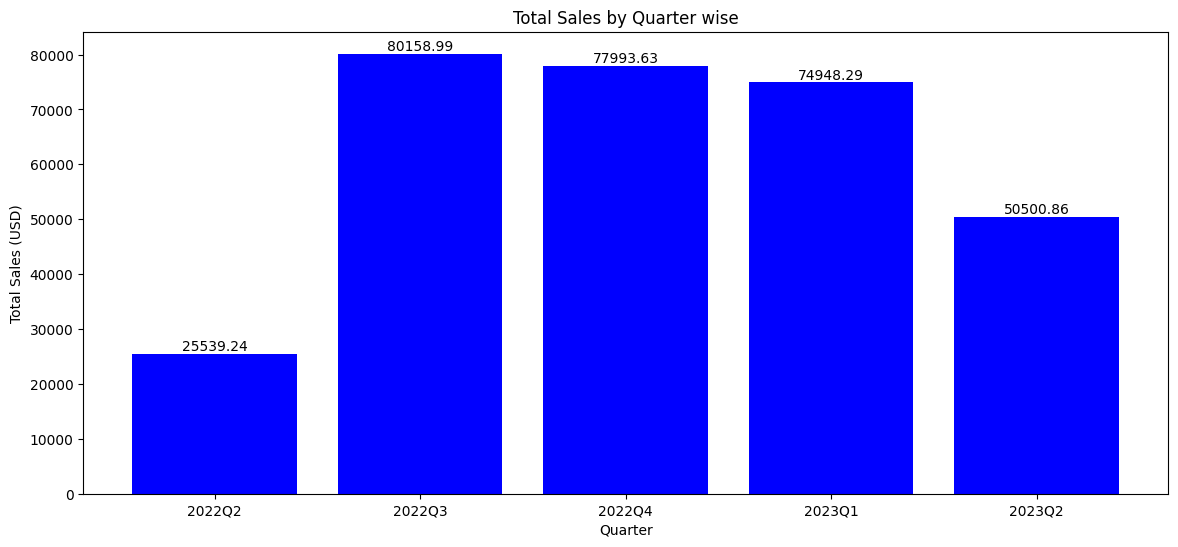

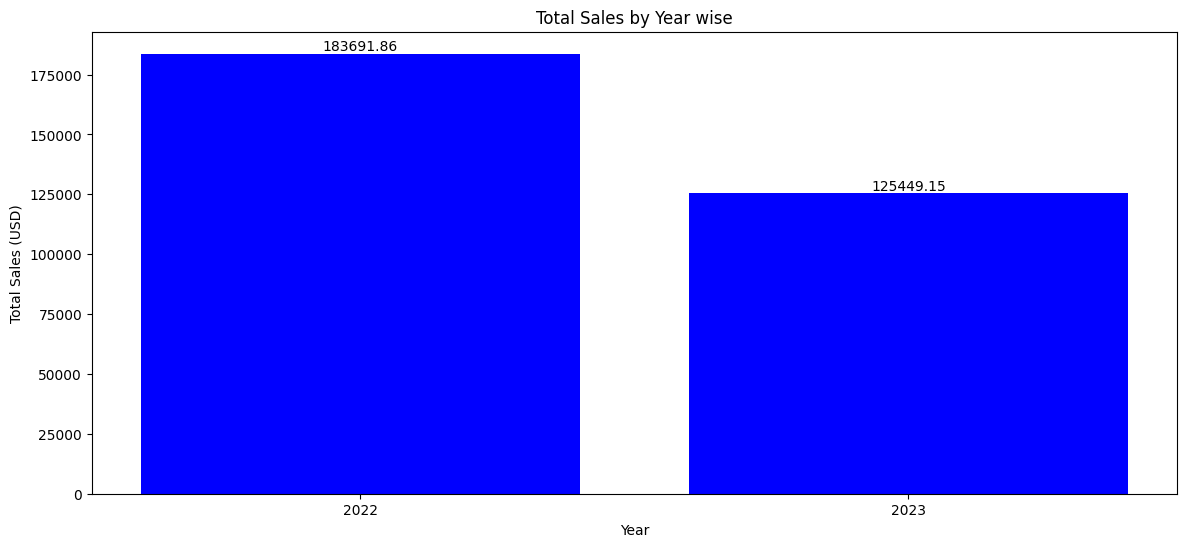

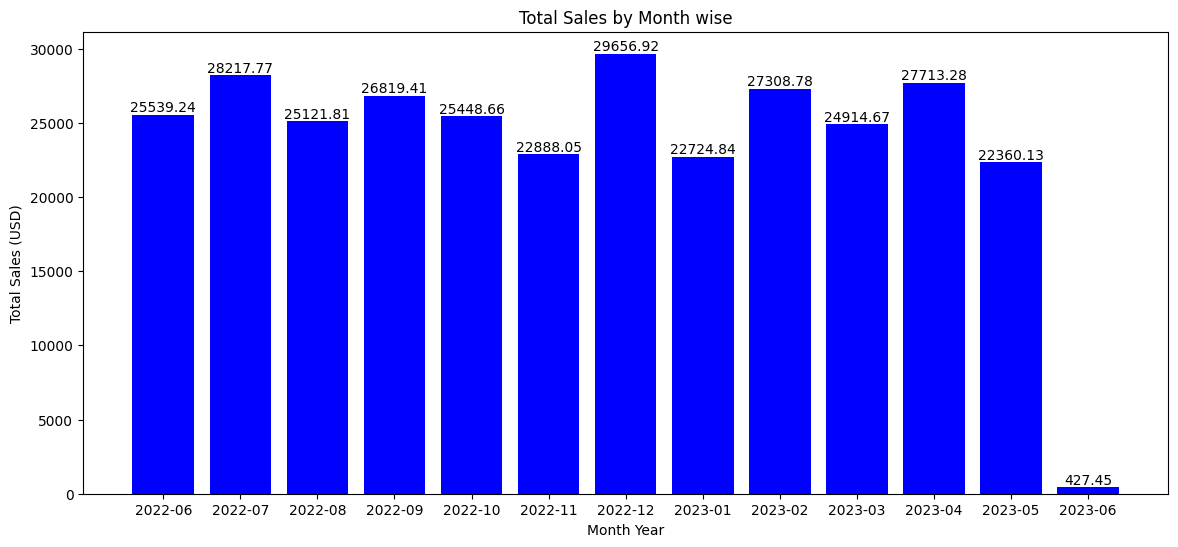

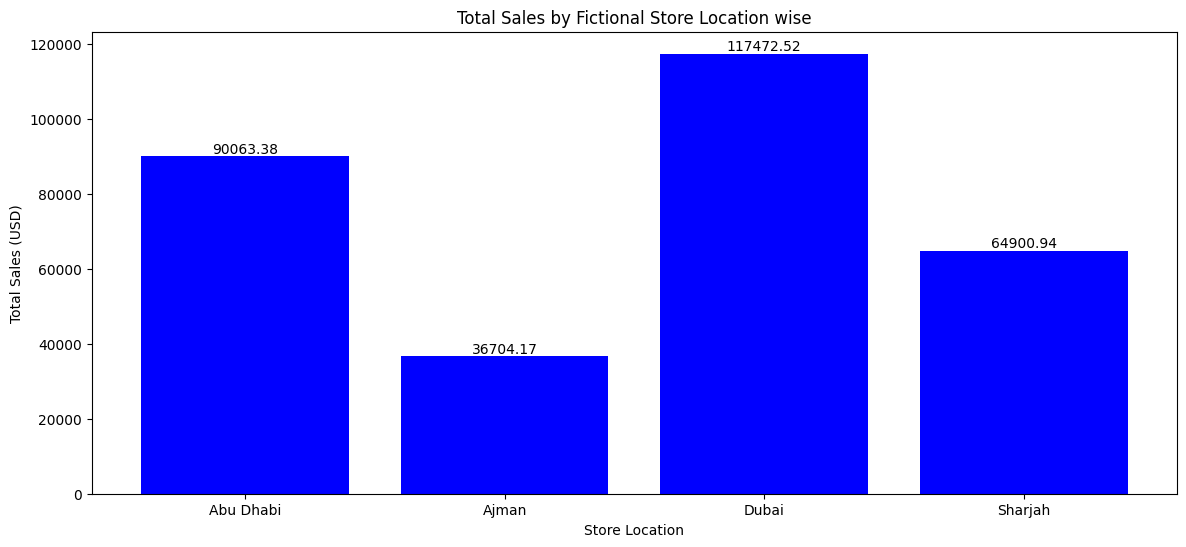

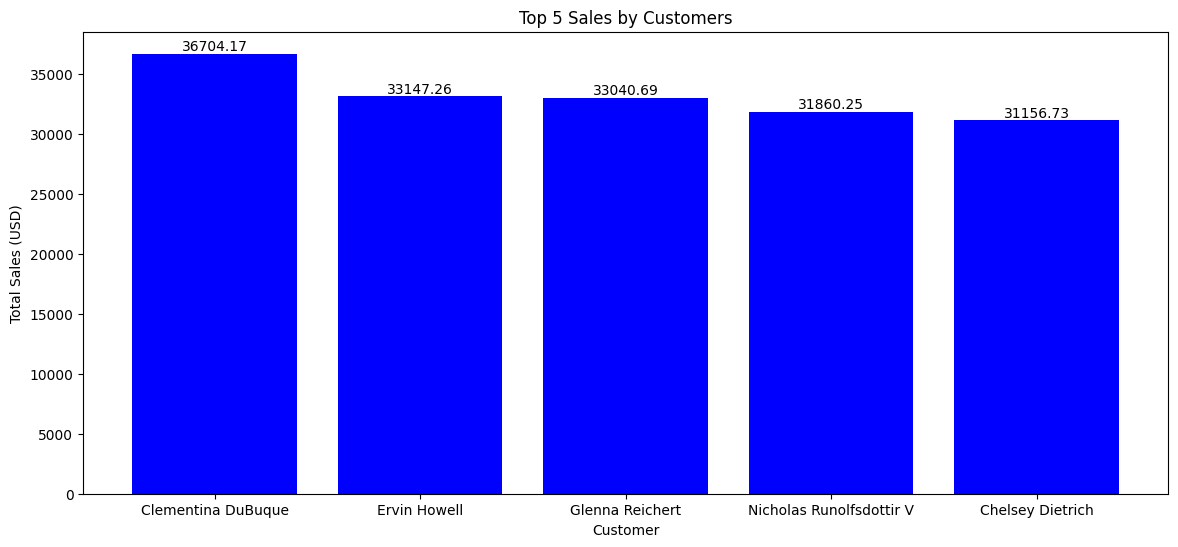

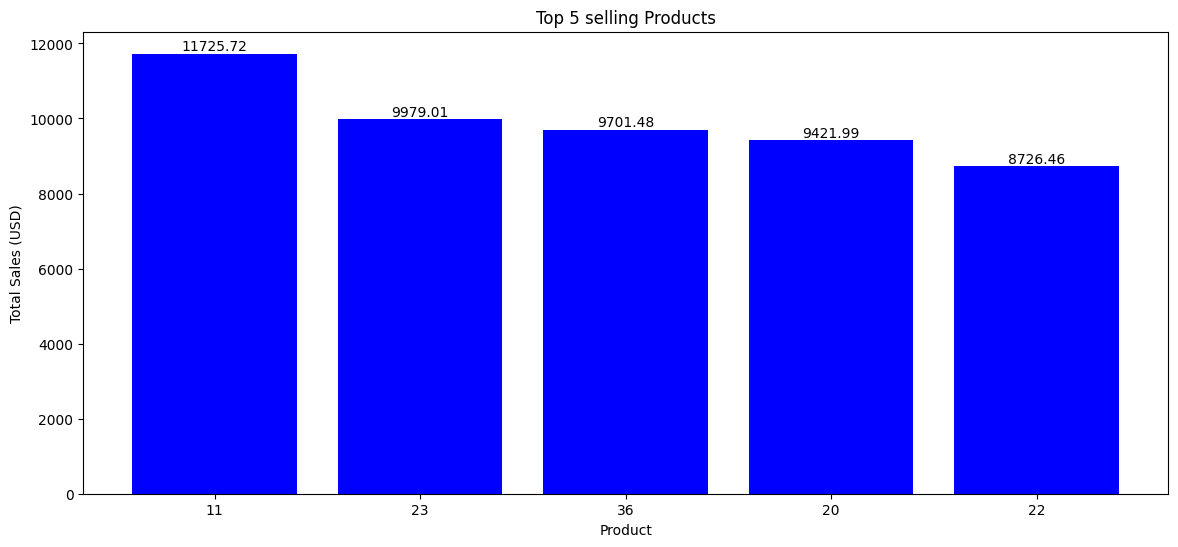

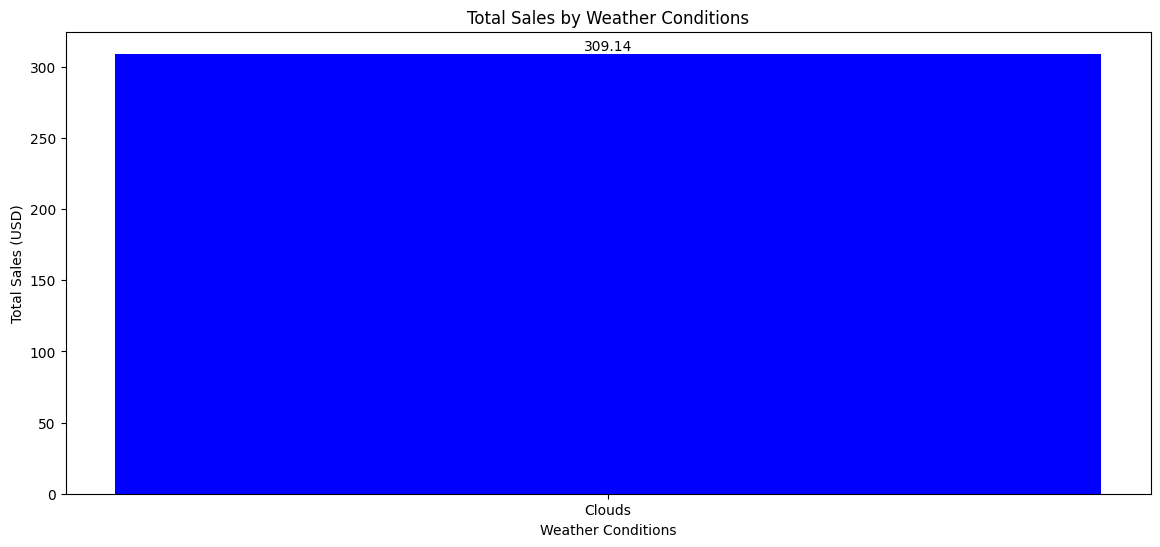

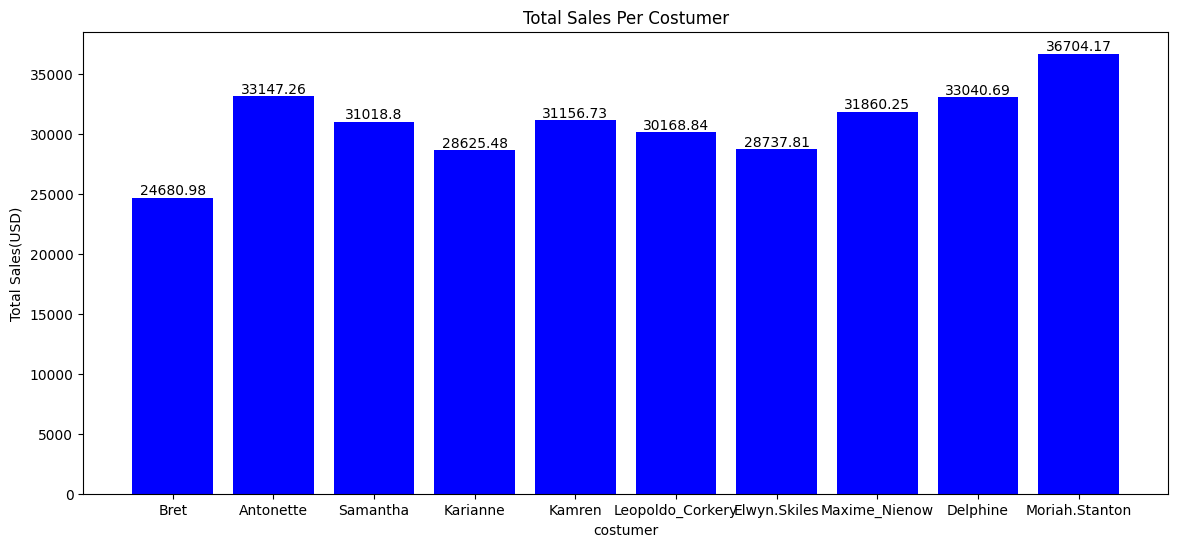

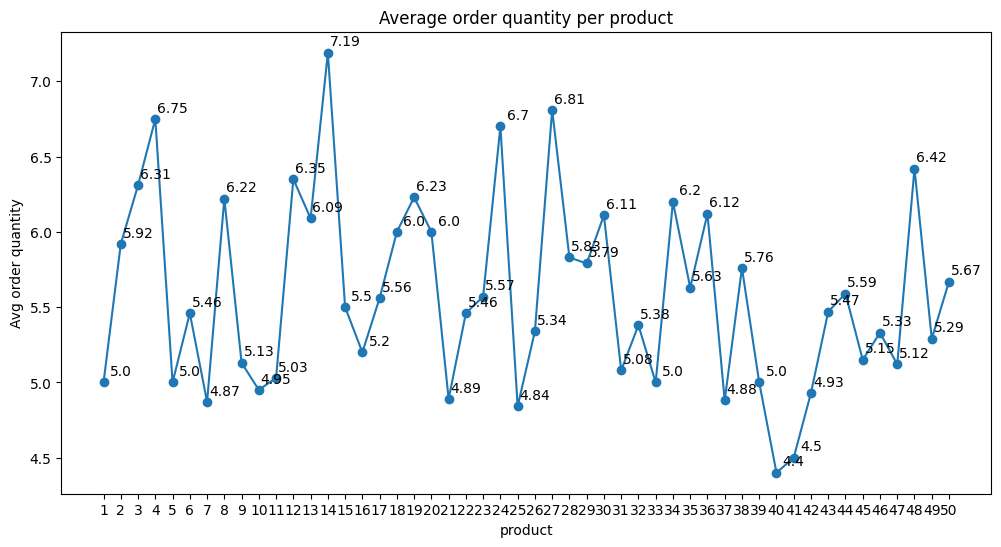

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# user define fuction to drawn the bar chart
def DrawBarChart(df,x, y, xLabel, yLabel, title):
    plt.figure(figsize=(14, 6))
    bars=plt.bar(df[x].astype('str'), df[y], color='blue')
    # Add value annotations on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.show()

def DrawLineChart(df,x, y, xLabel, yLabel, title):
    # Round the 'SalesAmount' values to 2 decimal places
    df[y] = df[y].round(2)
    plt.figure(figsize=(12, 6))
    line_plot= plt.plot(df[x].astype('str'), df[y], marker='o', label='')
    # Add value annotations on top of each point
    for i, txt in enumerate(df[y]):
        plt.annotate(txt, (df[x].iloc[i], df[y].iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.show()

# Create a bar plot by Quarter
DrawBarChart(total_sales_per_quarter,'quarter','sales_amount','Quarter','Total Sales (USD)','Total Sales by Quarter wise')

# Create a bar plot by Year  Wise
DrawBarChart(total_sales_per_year,'year','sales_amount','Year','Total Sales (USD)','Total Sales by Year wise')

# Create a bar plot by Month Wise
DrawBarChart(total_sales_per_month,'month','sales_amount','Month Year','Total Sales (USD)','Total Sales by Month wise')

# Create a bar plot by Fictional Store Location
DrawBarChart(total_sales_per_store_location,'store_location','sales_amount','Store Location','Total Sales (USD)','Total Sales by Fictional Store Location wise')


# Create a bar plot by Fictional Store Location
DrawBarChart(top_customers,'customer_name','sales_amount','Customer','Total Sales (USD)','Top 5 Sales by Customers')

# Create a bar plot by Fictional Store Location
DrawBarChart(top_selling_products,'product_id','sales_amount','Product','Total Sales (USD)','Top 5 selling Products')


# Create a bar plot by Fictional Weather Condition
DrawBarChart(total_sales_per_weather_condition,'weather_condition','sales_amount','Weather Conditions','Total Sales (USD)','Total Sales by Weather Conditions')

# Create a bar plot by Fictional Weather Condition
DrawBarChart(total_sales_per_customer,'username','sales_amount','costumer','Total Sales(USD)', 'Total Sales Per Costumer')

# Create a line plot by Fictional Weather Condition
DrawLineChart(avg_order_quantity_per_product,'product_id','avg_quantity','product','Avg order quantity','Average order quantity per product')                       